In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import std
from numpy import cov
from math import sqrt
from scipy.stats import pearsonr, spearmanr
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
insurance = pd.read_csv('../input/insurance/insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# ***Pre-processing & Data Analysis***

In [4]:
insurance.isnull().sum() # starting out data pre processing

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**none of our data contains null fields -> all data is filled in. Looking at our graphs, no outliers exist**

In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**No values in our data seem anomalous, and all of our data fits realistic patterns**

On average, smokers have £ 23615.96 more charges!


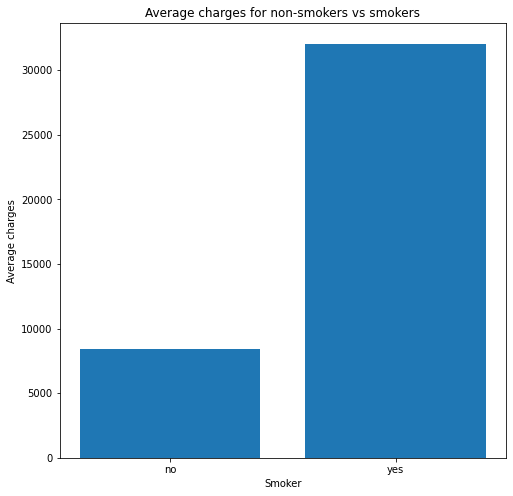

In [6]:
plt.figure(figsize=(8,8))
myplot = insurance.groupby('smoker').mean()
x_axis = myplot.index.values
y_axis = myplot['charges']
plt.bar(x_axis, y_axis)
plt.xlabel('Smoker')
plt.ylabel('Average charges')
plt.title('Average charges for non-smokers vs smokers')
print('On average, smokers have £', round(y_axis['yes']-y_axis['no'] , 2), 'more charges!')

**We have a significant rise in average charges across all Ages and BMI based on smoking**

Average charges for non-smokers: 8434.27

Average charges for non-smokers with a high BMI: 8853.28

 [[1.98342438e+02 5.30068008e+04]
 [5.30068008e+04 3.59254205e+07]]

Pearsons correlation: 0.628

Pearsons correlation for high BMI: 0.631


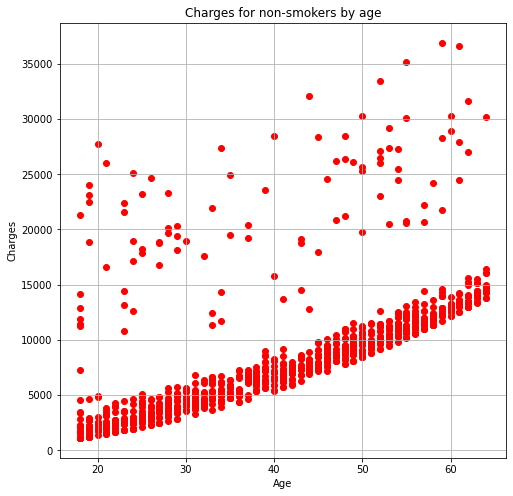

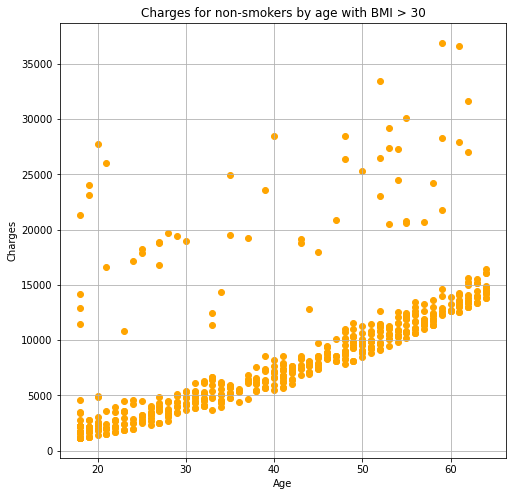

In [7]:
plt.figure(figsize=(8,8))
myplot2 = insurance.loc[insurance['smoker'] == 'no'] 
myplot2.loc[myplot2['bmi'] > 30]
plt.scatter(myplot2['age'], myplot2['charges'], color='red', marker='o')
plt.xlabel('Age',fontsize=10)
plt.ylabel('Charges',fontsize=10)
plt.grid(True)
plt.title('Charges for non-smokers by age')

plt.figure(figsize=(8,8))
myplot_bmi = insurance.loc[insurance['smoker'] == 'no']
myplot_bmi = myplot_bmi.loc[myplot_bmi['bmi'] > 30]
plt.scatter(myplot_bmi['age'], myplot_bmi['charges'], color='orange', marker='o')
plt.xlabel('Age',fontsize=10)
plt.ylabel('Charges',fontsize=10)
plt.grid(True)
plt.title('Charges for non-smokers by age with BMI > 30')

print ('Average charges for non-smokers: %.2f'% myplot2['charges'].mean())
print('\nAverage charges for non-smokers with a high BMI: %.2f'%myplot_bmi['charges'].mean())
nonsmokervar = cov(myplot2['age'], myplot2['charges']) # covariance
nonsmokerpearson, _ = pearsonr(myplot2['age'], myplot2['charges'])
pearson_highbmi, _ = pearsonr(myplot_bmi['age'], myplot_bmi['charges'])
print ('\n',nonsmokervar)
print ('\nPearsons correlation: %.3f' % nonsmokerpearson)
print ('\nPearsons correlation for high BMI: %.3f' % pearson_highbmi)

**Age is positively correlated to the charges on the insurance cost. A few outliers could be explained by current health conditions, BMI doesn't have a major direct link within its correlation and charges remain fairly similar**

Average charges for smokers: 32050.23

Average charges for smokers with a high BMI: 41692.81

 [[1.93855097e+02 5.91718651e+04]
 [5.91718651e+04 1.33207311e+08]]

Pearsons correlation: 0.368

Spearmans correlation: 0.452

Pearsons correlation: 0.698

Spearmans correlation: 0.811


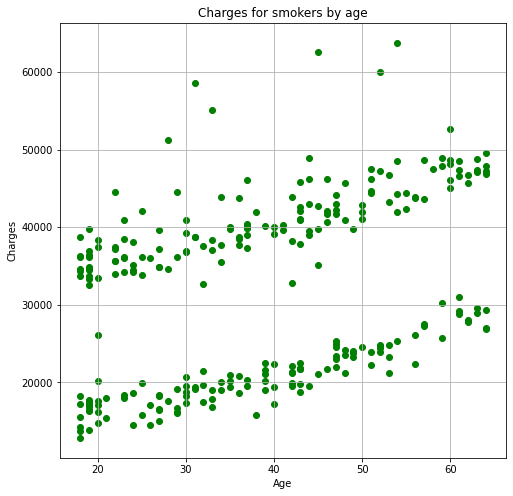

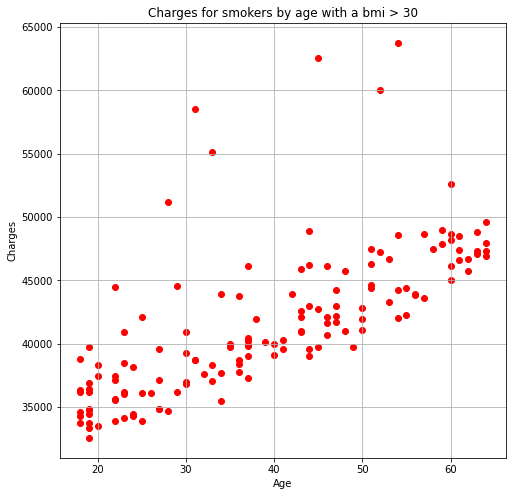

In [8]:
plt.figure(figsize=(8,8))
myplot3 = insurance.loc[insurance['smoker'] == 'yes']
plt.scatter(myplot3['age'], myplot3['charges'], color='green', marker='o')
plt.xlabel('Age',fontsize=10)
plt.ylabel('Charges',fontsize=10)
plt.grid(True)
plt.title('Charges for smokers by age')

plt.figure(figsize=(8,8))
myplot_bmi1 = insurance.loc[insurance['smoker'] == 'yes']
myplot_bmi1 = myplot_bmi1.loc[myplot_bmi1['bmi'] > 30]
plt.scatter(myplot_bmi1['age'], myplot_bmi1['charges'], color='red', marker='o')
plt.xlabel('Age',fontsize=10)
plt.ylabel('Charges',fontsize=10)
plt.grid(True)
plt.title('Charges for smokers by age with a bmi > 30')


print ('Average charges for smokers: %.2f'% myplot3['charges'].mean())
print('\nAverage charges for smokers with a high BMI: %.2f'%myplot_bmi1['charges'].mean())
smokervar = cov(myplot3['age'], myplot3['charges'])
smokerpearson, _ = pearsonr(myplot3['age'], myplot3['charges'])
smokerspearman, _ = spearmanr(myplot3['age'], myplot3['charges'])
smokerhighbmi_p, _ = pearsonr(myplot_bmi1['age'], myplot_bmi1['charges'])
smokerhighbmi_s, _ = spearmanr(myplot_bmi1['age'], myplot_bmi1['charges'])
print ('\n',smokervar)
print ('\nPearsons correlation: %.3f' % smokerpearson)
print ('\nSpearmans correlation: %.3f' % smokerspearman)
print ('\nPearsons correlation: %.3f' % smokerhighbmi_p)
print ('\nSpearmans correlation: %.3f' % smokerhighbmi_s)

**Being a smoker significantly raises up the insurance cost. Also your BMI affects your insurance cost more if you are a smoker, and on average it goes up**

Analysis values for BMI for all subjects:

[[5.32902504e+01 1.97232520e+04]
 [1.97232520e+04 1.02479877e+08]]

Pearsons correlation: 0.267

Spearman correlation: 0.195

Analysis values for BMI for smokers:

[[4.37887735e+01 6.32790230e+04]
 [6.32790230e+04 1.38431236e+08]]

Pearsons correlation: 0.813

Spearman correlation: 0.841

Analysis values for BMI for non-smokers:

[[5.01646431e+01 4.91269069e+03]
 [4.91269069e+03 1.98744011e+07]]

Pearsons correlation: 0.156

Spearman correlation: 0.154



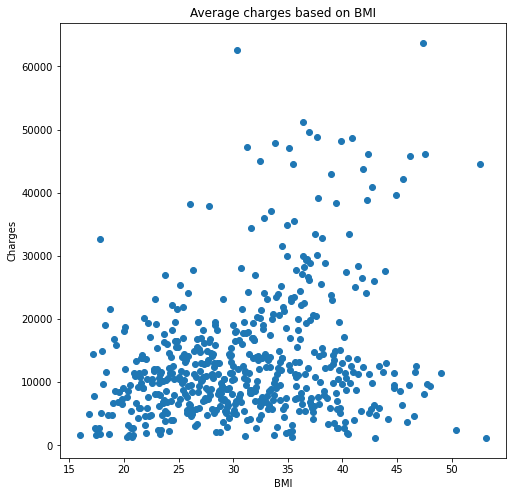

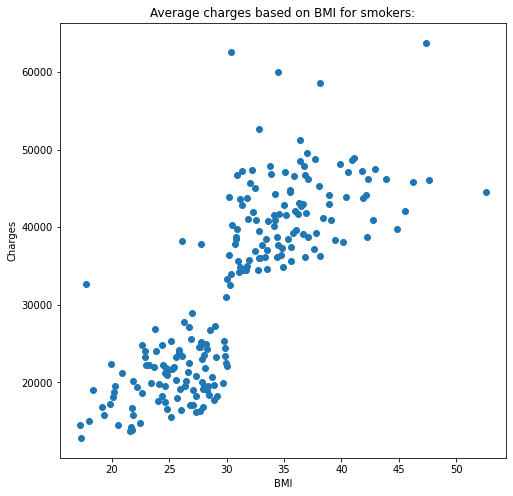

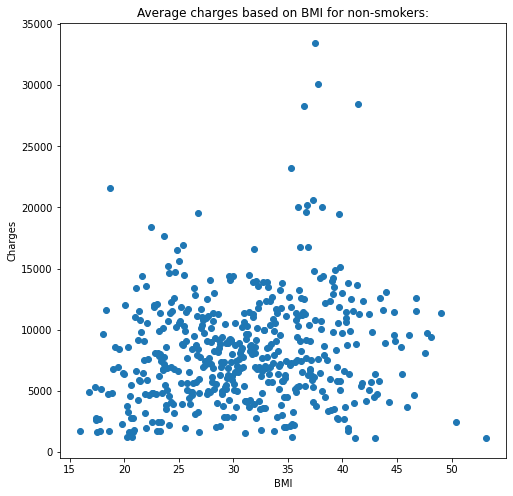

In [9]:
plt.figure(figsize=(8,8))
myplot4 = insurance.groupby('bmi').mean()
x_axis = myplot4.index.values
y_axis = myplot4['charges']
plt.scatter(x_axis, y_axis)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Average charges based on BMI')

bmivar = cov(x_axis, y_axis)
bmipearson, _ = pearsonr(x_axis, y_axis)
bmispearman, _ = spearmanr(x_axis, y_axis)
print('Analysis values for BMI for all subjects:\n')
print (bmivar)
print ('\nPearsons correlation: %.3f' % bmipearson)
print ('\nSpearman correlation: %.3f\n' % bmispearman)

# charges with smokers = 'yes'

plt.figure(figsize=(8,8))
myplot5 = insurance.loc[insurance['smoker'] == 'yes']
myplot5 = myplot5.groupby('bmi').mean()
x_axis = myplot5.index.values
y_axis = myplot5['charges']
plt.scatter(x_axis, y_axis)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Average charges based on BMI for smokers:')

bmivar = cov(x_axis, y_axis)
bmipearson, _ = pearsonr(x_axis, y_axis)
bmispearman, _ = spearmanr(x_axis, y_axis)
print('Analysis values for BMI for smokers:\n')
print (bmivar)
print ('\nPearsons correlation: %.3f' % bmipearson)
print ('\nSpearman correlation: %.3f\n' % bmispearman)

#charges with smokers = 'no'

plt.figure(figsize=(8,8))
myplot6 = insurance.loc[insurance['smoker'] == 'no']
myplot6 = myplot6.groupby('bmi').mean()
x_axis = myplot6.index.values
y_axis = myplot6['charges']
plt.scatter(x_axis, y_axis)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Average charges based on BMI for non-smokers:')

bmivar = cov(x_axis, y_axis)
bmipearson, _ = pearsonr(x_axis, y_axis)
bmispearman, _ = spearmanr(x_axis, y_axis)
print('Analysis values for BMI for non-smokers:\n')
print (bmivar)
print ('\nPearsons correlation: %.3f' % bmipearson)
print ('\nSpearman correlation: %.3f\n' % bmispearman)

**Some weak correlation of charges between BMI, with a low Pearsons correlation. However BMI has a higher positive correlation for smokers**

[Text(0.5, 1.0, 'Frequency of amount of children')]

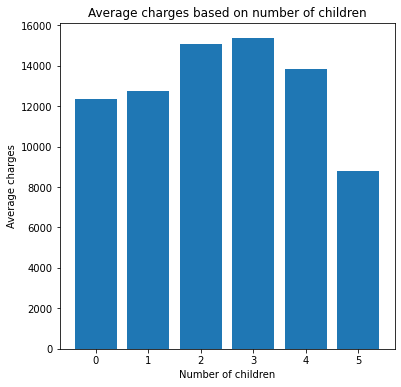

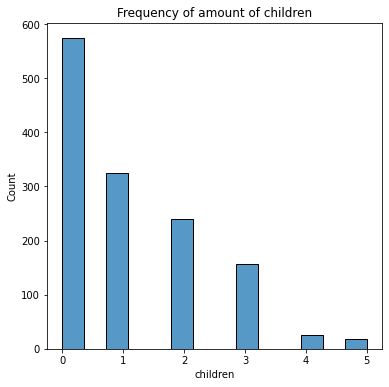

In [10]:
plt.figure(figsize=(6,6))
myplot5 = insurance.groupby('children').mean()
x_axis = myplot5.index.values
y_axis = myplot5['charges']
plt.bar(x_axis, y_axis)
plt.xlabel('Number of children')
plt.ylabel('Average charges')
plt.title('Average charges based on number of children')

plt.figure(figsize=(6,6))
sns.histplot(insurance, x='children').set(title="Frequency of amount of children")

**There is a weak positive correlation between having 0 ≤ x ≤ 3, however the correlation decrease at x > 3 due to a lower frequency of people having so many children**

<AxesSubplot:>

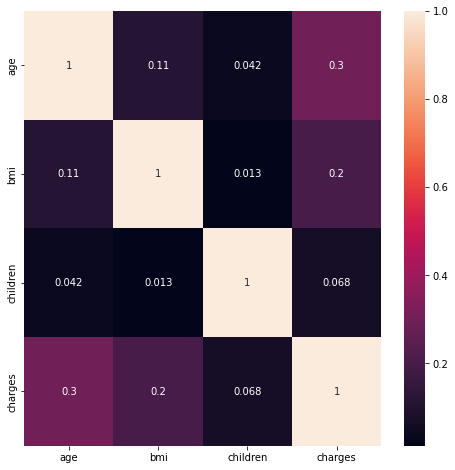

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(insurance.corr(),annot=True)

**Our heatmap shows us the most correlation between charges is by age, followed by BMI and then children**

# **Algorithms Critical Analysis**

# Random Forest Algorithm

**I chose the RF algorithm. We are working on a regression problem and attempting to calculate a insurance cost prediction. The algorithm should work well as we have a large enough dataset**

We firstly change our smoker column to a readable integer value for our regression

In [12]:
is_smoker = ['smoker']
final_data = pd.get_dummies(insurance,columns=is_smoker,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   region      1338 non-null   object 
 5   charges     1338 non-null   float64
 6   smoker_yes  1338 non-null   uint8  
dtypes: float64(2), int64(2), object(2), uint8(1)
memory usage: 64.2+ KB


We then seperate our data into features (->columns used for the prediction) and targets(->value we want to predict). We also drop the axis that have no effect on our insurance cost

In [13]:
charges = np.array(insurance['charges']) #array for charges, which is what we want to predict (our label)
new_insurance = final_data.drop(['charges','sex','region'],axis=1)
insurance_list = list(new_insurance.columns)
new_insurance = np.array(new_insurance) #array for our features (variables)

Then we split our data into training and testing

In [14]:
train_features, test_features, train_labels, test_labels = train_test_split(new_insurance, charges, test_size=0.25, random_state=42) 
#use 42 for random state to produce consistent results
print(train_labels)

[ 2352.96845  4340.4409   9391.346   ... 11931.12525 46113.511
 10214.636  ]


Our baseline will be the *maximum insurance cost that has averaged out based our data for age, bmi and smoker*

In [15]:
rf = RandomForestRegressor(n_estimators = 900, random_state=42) #use of 1000 decision trees

rf.fit(train_features, train_labels) # teaching our model to learn the relatioships in our data

predict = rf.predict(test_features) # predict our data, based on only seeing the features
errors = abs(predict - test_labels) # check the difference from the prediction vs the actual result
print('Mean Absolute Error:', '£',round(np.mean(errors), 2))

Mean Absolute Error: £ 2613.53


Originally using 1000 decision trees, I found that it was more optimal to use 900 instead and it produced slightly better results

**Our Random Forest Algorithm has succesfully calculate a prediction cost, with a £2613.53 average margin error. Using 900 decision trees and a test size of 0.25**

# KNN Algorithm

This algorithm uses instances in n-dimensional space and its neightbours distances to calculate predictions

With this Algorithm, we need to firstly create an elbow curve to find our optimal k value

**Elbow curve creation**

<AxesSubplot:>

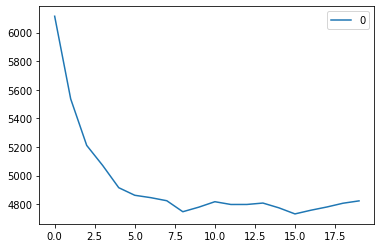

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))

labels_scaled = scaler.fit_transform(train_features)  #data pre-processing and Scaling
train_features = pd.DataFrame(labels_scaled)

tlabels_scaled = scaler.fit_transform(test_features)
test_features = pd.DataFrame(tlabels_scaled)


rmse = [] #root squared mean, to measure our regression error

for K in range(20): #we begin by testing out different values for k and seeing what the error margin is
    K = K+1
    knn1 = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    knn1.fit(train_features, train_labels)
    predict2=knn1.predict(test_features)
    error = sqrt(mean_squared_error(test_labels, predict2))
    rmse.append(error)

elbow_curve = pd.DataFrame(rmse) #creating our elbow curve, rmse and k value
elbow_curve.plot()

We want a k value that gives us the lowest RSME. The lower this number, the better our model is.
The root mean squared error (rsme) shows us the square root of the average difference between our predicted and actual result. 

Looking at our elbow curve, the K value is most suitable around k=8 as with smaller values its significantly higher and then it increase again with bigger values. Therefore our predictive model gives us our best average RMSE when k=8 for our values

In [17]:
print('RMSE for K value of 8 = £',round(np.mean(rmse [8]),2 ))

RMSE for K value of 8 = £ 4747.38


**Since KNN uses its nearest neighbours, there is a moderate error margin. However our model will predict with a RMSE of £4747.38 compared to its actual value**

# Lasso Regression

**This algorithm uses shrinkage towards the mean to predict values. This also helps prevent overfitting**

We use an alpha value of 1.0 as this give us an ideal prediction

In [18]:
lasso_model = Lasso(alpha=1) 
lasso_model.fit(train_features, train_labels) #same data used for the other algorithms. Data is already scaled

predict3 = lasso_model.predict(test_features)
mae_error = abs(predict3 - test_labels)
print('Mean MAE: £',round(np.mean(mae_error), 2))

Mean MAE: £ 4261.28


**Using a value of alpha=1.0 we get error margins of approxim £4261.28 on average. This is slightly better than our KNN algorithm**